# Project Setup

### Importing the required libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.metrics import Precision, Recall, Accuracy
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score,log_loss
from tabulate import tabulate
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

### Declaring the Variables

In [3]:
IMAGE_SIZE = [299,299]
BATCH_SIZE=16
CLASSES=["LC1","LC4","LC5","LC6","LC9"]
NUMBER_OF_CLASSES=len(CLASSES)

In [4]:
training_image_dir='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/001_Dataset/Training'
testing_image_dir='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/001_Dataset/Testing'
validation_image_dir='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/001_Dataset/Validation'

### Fetching and Preprocessing the image files

In [5]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [6]:
training_image_data_set =tf.keras.utils.image_dataset_from_directory(
  training_image_dir,
  label_mode='int',
  seed=131,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE
)

Found 2880 files belonging to 5 classes.


In [7]:
validation_image_data_set=tf.keras.utils.image_dataset_from_directory(
    validation_image_dir,
    label_mode='int',
    seed=131,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 960 files belonging to 5 classes.


In [8]:
testing_image_data_set=tf.keras.utils.image_dataset_from_directory(
    testing_image_dir,
    label_mode='int',
    seed=131,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 960 files belonging to 5 classes.


In [9]:
print(f'Using {len(training_image_data_set)} sets for Training')
print(f'Using {len(validation_image_data_set)} sets for Validation')
print(f'Using {len(testing_image_data_set)} sets for Testing')

Using 180 sets for Training
Using 60 sets for Validation
Using 60 sets for Testing


In [10]:
normalized_training_set=training_image_data_set.map(lambda x,y: (normalization_layer(x), y))
normalized_validation_set=validation_image_data_set.map(lambda x,y: (normalization_layer(x), y))
normalized_testing_set=testing_image_data_set.map(lambda x,y: (normalization_layer(x), y))

# image_batch, labels_batch = next(iter(normalized_training_set))      #<-----the data is fethched in this form: image batch, label batch

# Training the Scratch Model

### Building the CNN Model

In [15]:
def Build_Model():
  model=Sequential()

  model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(299,299,3)))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64, (3,3), 1, activation='relu'))
  model.add(MaxPooling2D())

  model.add(Conv2D(64, (3,3), 1, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(128, (3,3), 1, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))
  model.add(Dense(NUMBER_OF_CLASSES, activation='softmax'))

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model

In [16]:
# Summary of the model
model=Build_Model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 297, 297, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 33, 33, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,520,325 (32.50 MB)

 Trainable params: 8,520,325 (32.50 MB)

 Non-trainable params: 0 (0.00 B)

### Peforming the 10 Fold Cross Validation

In [17]:

# Logs
logdir='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/003_Logs/10FoldCrossValidatedModel_Logs'

# Model Directory
model_dir='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/004_Cross_Validated_Models/'

In [18]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [19]:
FOLDS=10
SCORES_PER_FOLD=[]

In [20]:
TFold_Total_Time=0
i=0
j=18
k=162
fold_var=0

In [21]:
for fold_var in range(0, FOLDS, 1):
  TFold_start=time.time()
  print(f'Fold {fold_var+1}')
  print('--------------------------------------------------------------------------------------------')
  training_set1=normalized_training_set.take(i)
  training_set2=normalized_training_set.skip(i+j).take(k)
  training_set=training_set1.concatenate(training_set2)
  validation_set=normalized_training_set.skip(i).take(j)
  i=i+18
  j=18
  k=k-18

  model=Build_Model()
  Model_Run = model.fit(
    training_set,
    epochs=10,
    callbacks=[tensorboard_callback]
  )
  print('\n')
  print(f'Evaluating the model')
  print('\n')
  cur_scores=model.evaluate(validation_set)
  cur_scores[0]*=100
  cur_scores[1]*=100
  cur_scores=[fold_var+1,cur_scores[0],cur_scores[1]]
  SCORES_PER_FOLD.append(cur_scores)
  model.save(model_dir+'model_'+str(fold_var+1)+'.h5')
  tf.keras.backend.clear_session()
  TFold_stop=time.time()
  TFold_Total_Time+=(TFold_stop-TFold_start)
  print('--------------------------------------------------------------------------------------------')

Fold 1
--------------------------------------------------------------------------------------------
Epoch 1/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 549s 3s/step - accuracy: 0.4534 - loss: 1.1836
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.7333 - loss: 0.4667
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.8040 - loss: 0.3184
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.8220 - loss: 0.2776
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.8005 - loss: 0.3230
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.7886 - loss: 0.3327
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.8262 - loss: 0.2753
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.8182 - loss: 0.2825
Epoch 9/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.8272 - loss: 0.2877
Epoch 10/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.8441 - loss: 0.2694


Evaluating the mod

--------------------------------------------------------------------------------------------
Fold 2
--------------------------------------------------------------------------------------------
Epoch 1/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.4605 - loss: 1.1771
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.6736 - loss: 0.5432
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - accuracy: 0.7128 - loss: 0.5145
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.7774 - loss: 0.3923
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.8188 - loss: 0.2903
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.8093 - loss: 0.2975
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - accuracy: 0.8255 - loss: 0.2778
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8032 - loss: 0.2973
Epoch 9/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.8205 - loss: 0.2859
Epoch 10/10
162

--------------------------------------------------------------------------------------------
Fold 3
--------------------------------------------------------------------------------------------
Epoch 1/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.3113 - loss: 1.5576
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.5649 - loss: 0.8058
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7626 - loss: 0.4350
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.7914 - loss: 0.3308
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.7760 - loss: 0.3213
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.7897 - loss: 0.3530
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.8010 - loss: 0.2819
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - accuracy: 0.8174 - loss: 0.2777
Epoch 9/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.8110 - loss: 0.2784
Epoch 10/10
162

--------------------------------------------------------------------------------------------
Fold 4
--------------------------------------------------------------------------------------------
Epoch 1/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.3746 - loss: 1.3211
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.6326 - loss: 0.7028
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 14s 85ms/step - accuracy: 0.7048 - loss: 0.6006
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.7904 - loss: 0.3167
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 14s 85ms/step - accuracy: 0.7557 - loss: 0.4884
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 14s 85ms/step - accuracy: 0.7648 - loss: 0.4128
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 14s 85ms/step - accuracy: 0.8129 - loss: 0.2960
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.8220 - loss: 0.2719
Epoch 9/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.8175 - loss: 0.2995
Epoch 10/10
162

--------------------------------------------------------------------------------------------
Fold 5
--------------------------------------------------------------------------------------------
Epoch 1/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.4034 - loss: 1.2142
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.6760 - loss: 0.5498
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.7244 - loss: 0.5184
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.7967 - loss: 0.3005
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.7996 - loss: 0.2996
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.8134 - loss: 0.2923
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.8279 - loss: 0.2715
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.8159 - loss: 0.3119
Epoch 9/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.8260 - loss: 0.2913
Epoch 10/10
162

--------------------------------------------------------------------------------------------
Fold 6
--------------------------------------------------------------------------------------------
Epoch 1/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.4424 - loss: 1.2035
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.6535 - loss: 0.5739
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.6378 - loss: 0.6611
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.7668 - loss: 0.4075
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.8071 - loss: 0.3087
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.8133 - loss: 0.2913
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.8103 - loss: 0.2874
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accuracy: 0.8045 - loss: 0.3689
Epoch 9/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.8245 - loss: 0.2744
Epoch 10/10
162

--------------------------------------------------------------------------------------------
Fold 7
--------------------------------------------------------------------------------------------
Epoch 1/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - accuracy: 0.3928 - loss: 1.3470
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.6277 - loss: 0.6514
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.7868 - loss: 0.3350
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.7803 - loss: 0.3946
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accuracy: 0.7979 - loss: 0.2970
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.8108 - loss: 0.2844
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.8071 - loss: 0.2798
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.8093 - loss: 0.2922
Epoch 9/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.8045 - loss: 0.2885
Epoch 10/10
1

--------------------------------------------------------------------------------------------
Fold 8
--------------------------------------------------------------------------------------------
Epoch 1/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.3901 - loss: 1.3075
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.7182 - loss: 0.5210
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.7911 - loss: 0.3098
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.7884 - loss: 0.3227
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - accuracy: 0.7999 - loss: 0.3110
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - accuracy: 0.7648 - loss: 0.4287
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.8019 - loss: 0.2871
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.8057 - loss: 0.2920
Epoch 9/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.7977 - loss: 0.2860
Epoch 

--------------------------------------------------------------------------------------------
Fold 9
--------------------------------------------------------------------------------------------
Epoch 1/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - accuracy: 0.4304 - loss: 1.1832
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.6573 - loss: 0.6123
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - accuracy: 0.7691 - loss: 0.3908
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.7975 - loss: 0.3032
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - accuracy: 0.8135 - loss: 0.3028
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 18s 109ms/step - accuracy: 0.7973 - loss: 0.2987
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 0.8200 - loss: 0.2945
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 21s 112ms/step - accuracy: 0.8261 - loss: 0.2722
Epoch 9/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - accuracy: 0.8236 - loss: 0.2730
Epoch 

--------------------------------------------------------------------------------------------
Fold 10
--------------------------------------------------------------------------------------------
Epoch 1/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.3932 - loss: 1.3039
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.6815 - loss: 0.5409
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.7148 - loss: 0.4951
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.7666 - loss: 0.3951
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.8023 - loss: 0.2989
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.8115 - loss: 0.2961
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.8182 - loss: 0.3065
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.7668 - loss: 0.4174
Epoch 9/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.8037 - loss: 0.3059
Epoch 10/10
16

--------------------------------------------------------------------------------------------


In [22]:
print(f'Time required for 10 Fold Cross Validation= {TFold_Total_Time} seconds')

Time required for 10 Fold Cross Validation= 2267.9744713306427 seconds


In [23]:
column_headers=['Fold Number','Validation Loss(%)','Validation Accuracy(%)']
print('10 Fold Cross Validation Result')
print(tabulate(SCORES_PER_FOLD, headers=column_headers, tablefmt="grid"))

10 Fold Cross Validation Result
+---------------+----------------------+--------------------------+
|   Fold Number |   Validation Loss(%) |   Validation Accuracy(%) |
+===============+======================+==========================+
|             1 |              28.5003 |                  79.8611 |
+---------------+----------------------+--------------------------+
|             2 |              48.7518 |                  69.0972 |
+---------------+----------------------+--------------------------+
|             3 |              56.5338 |                  67.3611 |
+---------------+----------------------+--------------------------+
|             4 |              50.1766 |                  77.0833 |
+---------------+----------------------+--------------------------+
|             5 |              29.7336 |                  78.8194 |
+---------------+----------------------+--------------------------+
|             6 |              29.7644 |                  80.5556 |
+---------------

### Selecting the model with highest accuracy for training

In [24]:
max_acc=SCORES_PER_FOLD[0][2]
max_acc_index=[]
for i in range(len(SCORES_PER_FOLD)):
  if(SCORES_PER_FOLD[i][2]>max_acc):
    max_acc=SCORES_PER_FOLD[i][2]
print(f'The maximum validation accuracy is: {max_acc}')
for i in range(len(SCORES_PER_FOLD)):
  if(SCORES_PER_FOLD[i][2]==max_acc):
    max_acc_index.append(i)
print(f'The folds having {max_acc} validation accuracy are:')
for i in range(len(max_acc_index)):
  print(max_acc_index[i]+1)

result=-1
if(len(max_acc_index)>1):
    min_loss=SCORES_PER_FOLD[max_acc_index[0]][1]
    j=0
    result=max_acc_index[0]
    while(j<len(max_acc_index)):
      index=max_acc_index[j]
      if(SCORES_PER_FOLD[index][1]<min_loss):
        min_loss=SCORES_PER_FOLD[index][1]
        result=index
      j+=1
else:
  result=max_acc_index[0]
print(f'Selecting the model of fold no {result+1} for fine parameter tuning')
model=load_model(model_dir+'model_'+str(result+1)+'.h5')

The maximum validation accuracy is: 82.29166865348816
The folds having 82.29166865348816 validation accuracy are:
7
Selecting the model of fold no 7 for fine parameter tuning


### Training the model for fine parameter tuning

In [25]:
# Log Directory
scratch_model_logdir='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/003_Logs/ScratchModel_Logs'

# Fine tuned Model Directory
scratch_model_dir='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/005_Fine_Tuned_Model/FineTuned_Model.h5'

# Generated Data Diagrams Directory
scratch_model_loss='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/ScratchModel/Loss'
scratch_model_accuracy='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/ScratchModel/Accuracy'
scratch_model_rocauc='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/ScratchModel/Roc_Auc'
scratch_model_rocauc_zoomed='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/ScratchModel/Roc_Auc_Zoomed'
scratch_model_confusion_matrix='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/ScratchModel/Confusion_Matrix'

In [26]:
scratch_model_tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=scratch_model_logdir)

In [27]:
Training_start=time.time()

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
Cur_Model_Run = model.fit(
    normalized_training_set,
    validation_data=normalized_validation_set,
    epochs=30,
    callbacks=[scratch_model_tensorboard_callback]
  )

Epoch 1/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.8069 - loss: 0.2907 - val_accuracy: 0.7427 - val_loss: 0.6995
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 25s 78ms/step - accuracy: 0.7935 - loss: 0.3846 - val_accuracy: 0.7406 - val_loss: 0.5751
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.8384 - loss: 0.2679 - val_accuracy: 0.7250 - val_loss: 0.6801
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.8287 - loss: 0.2710 - val_accuracy: 0.7281 - val_loss: 0.6939
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.8258 - loss: 0.2750 - val_accuracy: 0.6729 - val_loss: 1.1215
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.8276 - loss: 0.2768 - val_accuracy: 0.7260 - val_loss: 0.6741
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.8169 - loss: 0.2779 - val_accuracy: 0.7208 - val_loss: 0.7387
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.8389 - loss: 0.2753 - v

In [30]:
Training_stop=time.time()

In [31]:
print(f'Time required for model fine parameter tuning= {Training_stop-Training_start} seconds')

Time required for model fine parameter tuning= 725.3225355148315 seconds


### Saving the fine tuned model

In [32]:
model.save(scratch_model_dir)

### Plotting the performance of the model after fine parameter tuning

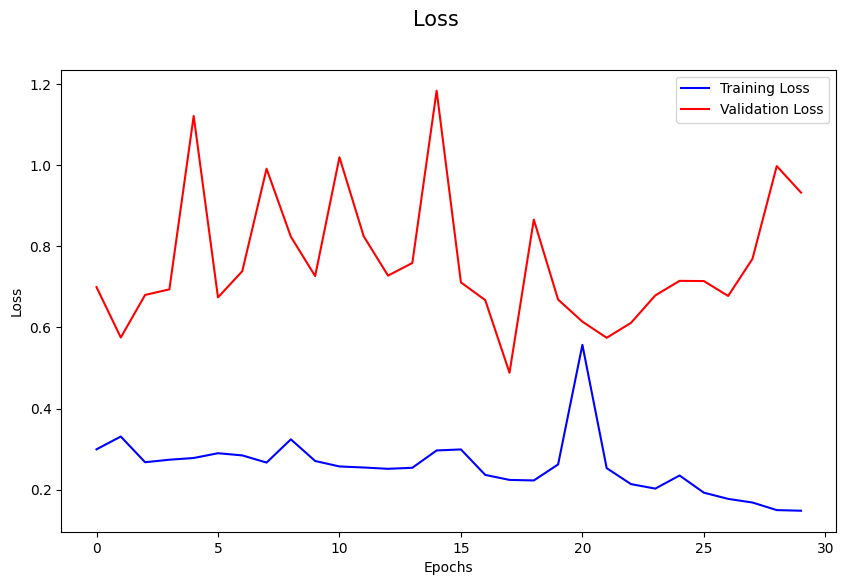

In [33]:
# Plotting the loss


fig=plt.figure(figsize=(10,6))
plt.plot(Cur_Model_Run.history['loss'], color='blue', label='Training Loss')
plt.plot(Cur_Model_Run.history['val_loss'], color='red', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
fig.suptitle('Loss',fontsize=15)
plt.legend()
plt.show()
fig.savefig(scratch_model_loss + '.eps', format='eps', dpi=600)
fig.savefig(scratch_model_loss + '.png', format='png', dpi=600)

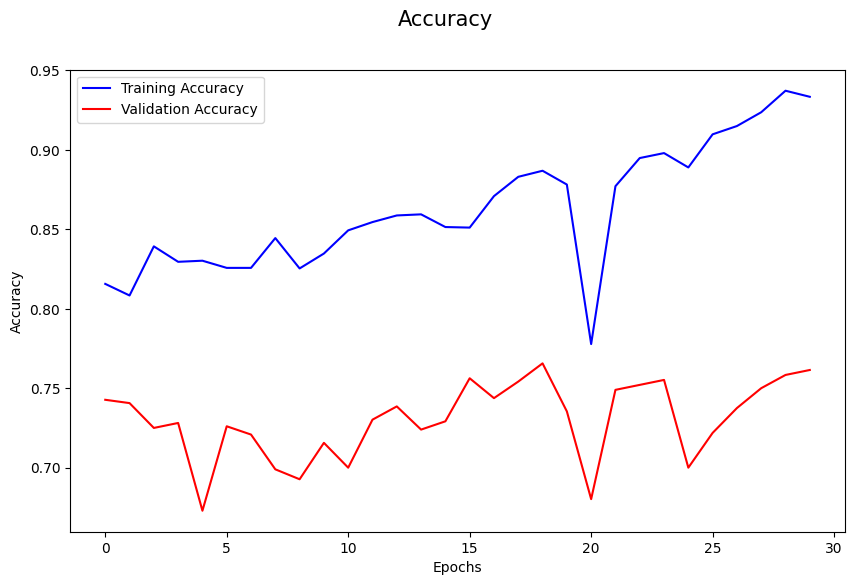

In [34]:
# Plotting the accuracy


fig=plt.figure(figsize=(10,6))
plt.plot(Cur_Model_Run.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(Cur_Model_Run.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
fig.suptitle('Accuracy',fontsize=15)
plt.legend()
plt.show()
fig.savefig(scratch_model_accuracy + '.eps', format='eps', dpi=600)
fig.savefig(scratch_model_accuracy + '.png', format='png', dpi=600)

### Calcualting Precision, Recall, Accuracy, F Score, Cohen-Kappa Score,ROC AUC and Log-Loss Score of the Model

In [35]:
pre = Precision()
re = Recall()
acc = Accuracy()

In [36]:
True_label=[]
Predicted_label=[]
Predicted_probabilities=[]
score=[]
for images,labels in (normalized_testing_set):
  score.append(model.evaluate(images,labels))
  for it in range(len(labels)):
    True_label.append(labels[it])
  pred=model.predict(images)
  y_max=[]
  for it in range(len(pred)):
      Predicted_probabilities.append(pred[it])
      y_max.append(np.argmax(pred[it]))
      Predicted_label.append(np.argmax(pred[it]))
  pre.update_state(labels,y_max)
  re.update_state(labels,y_max)
  acc.update_state(labels,y_max)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8125 - loss: 0.5839
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8750 - loss: 0.6601
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5625 - loss: 1.4707
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6875 - loss: 0.7533
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8750 - loss: 0.3893
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7500 - loss: 0.9791
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 1.6753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7500 - loss: 1.1325
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7500 - loss: 0.7799
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━

In [37]:
f_score=(2*pre.result().numpy()*re.result().numpy())/(pre.result().numpy()+re.result().numpy())

In [38]:
kappa=cohen_kappa_score(True_label,Predicted_label)

In [39]:
True_label=np.array(True_label)
Predicted_label=np.array(Predicted_label)
Predicted_probabilities=np.array(Predicted_probabilities)

In [40]:
Binarized_True_label=label_binarize(True_label,classes=[0, 1, 2, 3, 4])

In [41]:
#Calcualting the fpr, tpr and auc


fpr = [0] * NUMBER_OF_CLASSES
tpr = [0] * NUMBER_OF_CLASSES
roc_auc= [0] * NUMBER_OF_CLASSES
avg_roc_auc=0
for i in range(NUMBER_OF_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(Binarized_True_label[:, i], Predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [42]:
roc_auc_details=[]
for i in range(NUMBER_OF_CLASSES):
  temp=[CLASSES[i],roc_auc[i]]
  roc_auc_details.append(temp)

In [43]:
column_headers=['CLASS','ROC-AUC']
print('ROC-AUC Results')
print(tabulate(roc_auc_details, headers=column_headers, tablefmt="grid"))

ROC-AUC Results
+---------+-----------+
| CLASS   |   ROC-AUC |
+=========+===========+
| LC1     |  1        |
+---------+-----------+
| LC4     |  0.996663 |
+---------+-----------+
| LC5     |  0.975281 |
+---------+-----------+
| LC6     |  0.864065 |
+---------+-----------+
| LC9     |  0.858497 |
+---------+-----------+


In [44]:
avg_roc_auc=sum(roc_auc)/NUMBER_OF_CLASSES

In [45]:
print(f'The average ROC-AUC value is: {avg_roc_auc}')

The average ROC-AUC value is: 0.9389010959201389


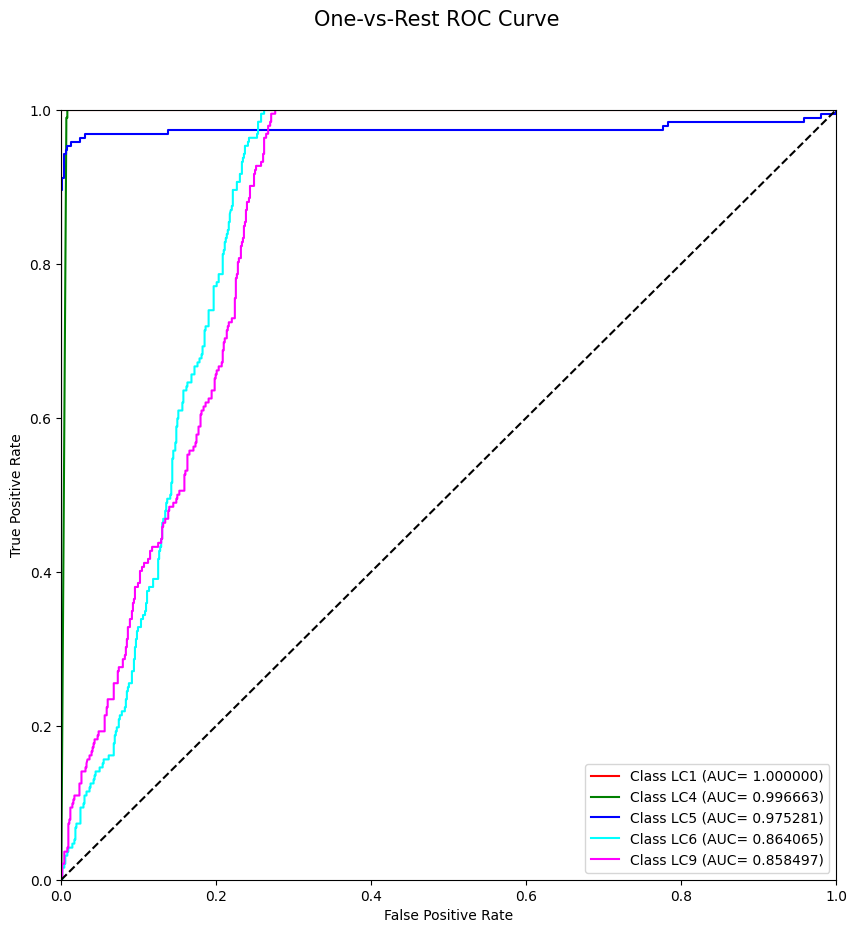

In [46]:
#Plotting the ROC Curve


fig=plt.figure(figsize=(10,10))
color=['red','green','blue','cyan','magenta','yellow','orange','purple']
for i in range(NUMBER_OF_CLASSES):
  plt.plot(fpr[i],tpr[i],color[i],label='Class {} (AUC= {:.6F})'.format(CLASSES[i],roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('One-vs-Rest ROC Curve',fontsize=15)
plt.legend(loc='lower right')
plt.show()
fig.savefig(scratch_model_rocauc + '.eps', format='eps', dpi=600)
fig.savefig(scratch_model_rocauc + '.png', format='png', dpi=600)

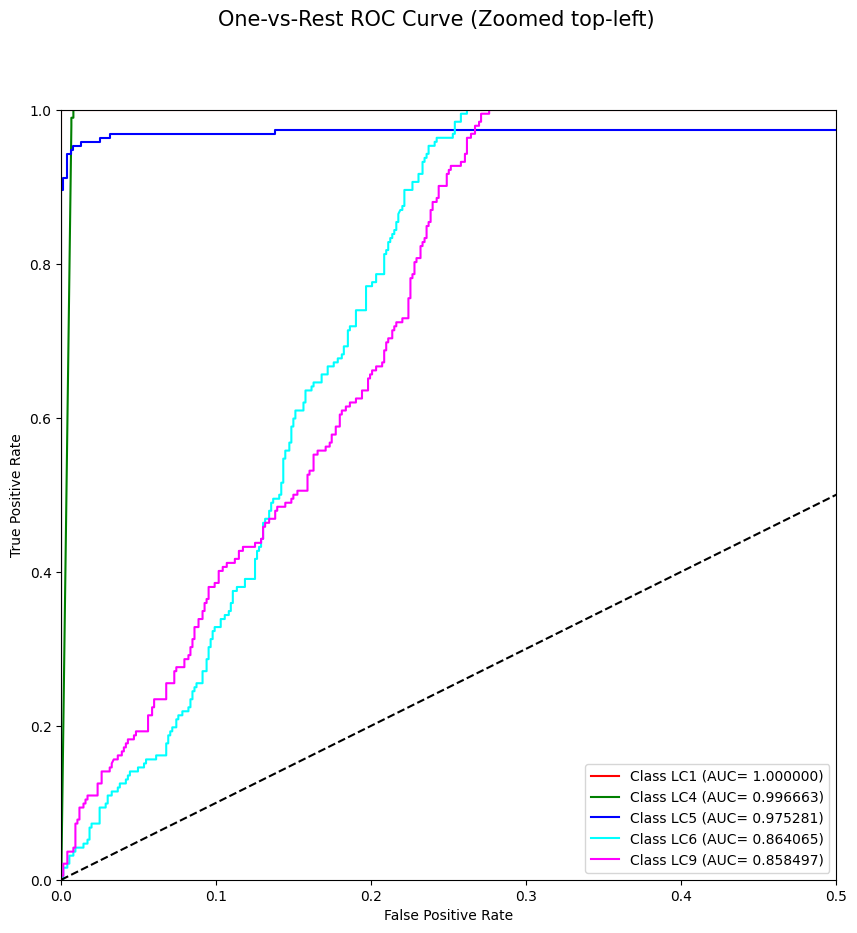

In [47]:
#Plotting the ROC Curve (Zoomed in at the top left corner)


fig=plt.figure(figsize=(10,10))
color=['red','green','blue','cyan','magenta','yellow','orange','purple']
for i in range(NUMBER_OF_CLASSES):
  plt.plot(fpr[i],tpr[i],color[i],label='Class {} (AUC= {:.6F})'.format(CLASSES[i],roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 0.50])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('One-vs-Rest ROC Curve (Zoomed top-left)',fontsize=15)
plt.legend(loc='lower right')
plt.show()
fig.savefig(scratch_model_rocauc_zoomed + '.eps', format='eps', dpi=600)
fig.savefig(scratch_model_rocauc_zoomed + '.png', format='png', dpi=600)

In [48]:
#Calculating the Log-loss Score (One-vs-Rest)


temp=[0]*NUMBER_OF_CLASSES
loss=[0]*NUMBER_OF_CLASSES
epsilon = 1e-15  # Small constant to avoid division by zero
N = Binarized_True_label.shape[0]

for i in range(NUMBER_OF_CLASSES):
  # Clip predicted probabilities to avoid log(0) cases
  temp[i]= np.clip(Predicted_probabilities[:,i], epsilon, 1 - epsilon)
  # Calculate cross-entropy loss
  loss[i] = -np.sum(Binarized_True_label[:,i] * np.log(temp[i])) / N

In [49]:
log_loss_result=[]
for i in range(NUMBER_OF_CLASSES):
  log_loss_result.append([CLASSES[i],loss[i]])

In [50]:
column_headers=['CLASS','LOG-LOSS VALUE']
print('Log-Loss Results')
print(tabulate(log_loss_result, headers=column_headers, tablefmt="grid"))

Log-Loss Results
+---------+------------------+
| CLASS   |   LOG-LOSS VALUE |
+=========+==================+
| LC1     |      0.0420336   |
+---------+------------------+
| LC4     |      1.26666e-07 |
+---------+------------------+
| LC5     |      0.202154    |
+---------+------------------+
| LC6     |      0.179599    |
+---------+------------------+
| LC9     |      0.449382    |
+---------+------------------+


In [51]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}, F Score: {f_score}, Cohen Kappa Score: {kappa}')

Precision: 0.9884169697761536, Recall: 1.0, Accuracy: 0.7770833373069763, F Score: 0.9941747776535442, Cohen Kappa Score: 0.7213541666666667


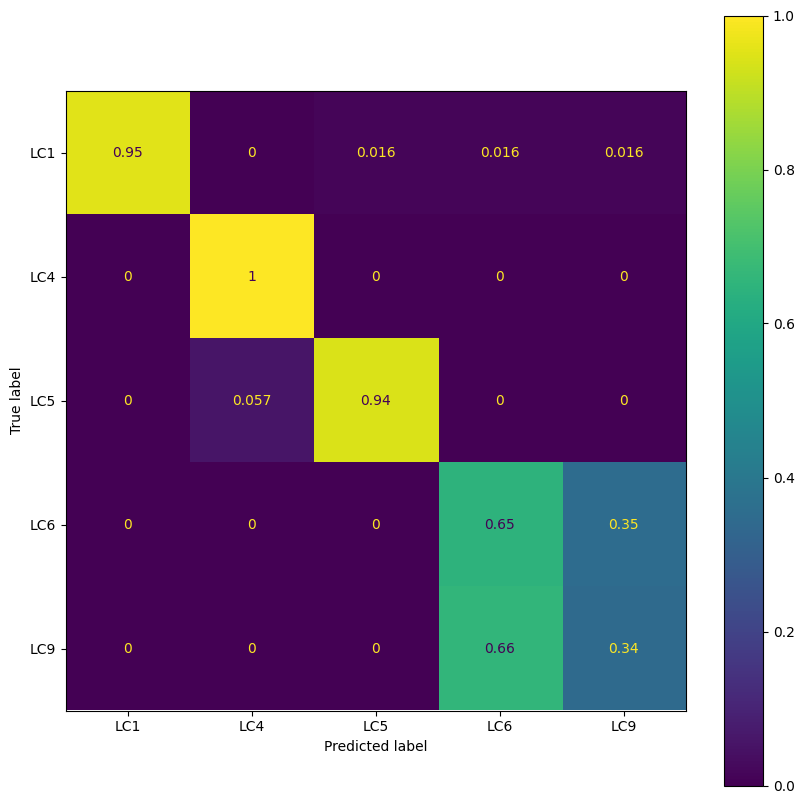

In [52]:
#Plotting the Confusion Matrix


confusion_matrix=metrics.confusion_matrix(True_label,Predicted_label,normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["LC1","LC4","LC5","LC6","LC9"])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.show()
fig.savefig(scratch_model_confusion_matrix + '.eps', format='eps', dpi=600)
fig.savefig(scratch_model_confusion_matrix + '.png', format='png', dpi=600)

### Demonstrating how to use the model

In [ ]:
img=image.load_img('/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/001_Dataset/Testing/LC4/LC4_dl_105.jpg',target_size=(299,299))

In [ ]:
x=image.img_to_array(img)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
x.shape

In [ ]:
pred=model.predict(x)

In [ ]:
print(pred)

In [ ]:
pred_name = CLASSES[np.argmax(pred)]
print(pred_name)

In [ ]:
temp_testing_set=normalized_testing_set.take(1)

pred_start=time.time()
for (images,labels) in (temp_testing_set):
  result=model.predict(images)
pred_stop=time.time()

In [ ]:
print(f'Time requrired for giving prediction on one set of {len(labels)} images= {pred_stop-pred_start}')
print(f'Average time requrired for giving prediction on one image= {(pred_stop-pred_start)/len(labels)}')

# Training the Pretrained Models

### Log Directories

In [ ]:
# Vgg16
vgg16_logdir='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/003_Logs/Vgg16_Logs'

# MobileNetV2
mobilenetv2_logdir='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/003_Logs/MobileNetV2_Logs'

# ResNet50
resnet50_logdir='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/003_Logs/ResNet50_Logs'

# EfficientNetB0
efficientnetb0_logdir='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/003_Logs/EfficientNetB0_Logs'


### Generated Data Diagrams Directories

In [ ]:
# Vgg16
vgg16_loss='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/Vgg16/Loss'
vgg16_accuracy='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/Vgg16/Accuracy'
vgg16_rocauc='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/Vgg16/Roc_Auc'
vgg16_rocauc_zoomed='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/Vgg16/Roc_Auc_Zoomed'
vgg16_confusion_matrix='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/Vgg16/Confusion_Matrix'

# MobileNetV2
mobilenetv2_loss='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/MobileNetV2/Loss'
mobilenetv2_accuracy='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/MobileNetV2/Accuracy'
mobilenetv2_rocauc='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/MobileNetV2/Roc_Auc'
mobilenetv2_rocauc_zoomed='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/MobileNetV2/Roc_Auc_Zoomed'
mobilenetv2_confusion_matrix='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/MobileNetV2/Confusion_Matrix'

# ResNet50
resnet50_loss='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/ResNet50/Loss'
resnet50_accuracy='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/ResNet50/Accuracy'
resnet50_rocauc='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/ResNet50/Roc_Auc'
resnet50_rocauc_zoomed='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/ResNet50/Roc_Auc_Zoomed'
resnet50_confusion_matrix='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/ResNet50/Confusion_Matrix'

# EfficientNetB0
efficientnetb0_loss='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/EfficientNetB0/Loss'
efficientnetb0_accuracy='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/EfficientNetB0/Accuracy'
efficientnetb0_rocauc='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/EfficientNetB0/Roc_Auc'
efficientnetb0_rocauc_zoomed='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/EfficientNetB0/Roc_Auc_Zoomed'
efficientnetb0_confusion_matrix='/content/drive/MyDrive/Conference_Journal/2024_Journal_LC_Cardamom_CNN_Work/006_Generated_Data_Diagrams/EfficientNetB0/Confusion_Matrix'

### Training the VGG16 Model and evaluating the performance

In [ ]:
from keras.applications import VGG16

In [ ]:
vgg16_tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=vgg16_logdir)

In [ ]:
vgg16_base=VGG16(weights='imagenet',include_top=False,input_shape=(299,299,3))
vgg16_model=Sequential()
vgg16_model.add(vgg16_base)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(NUMBER_OF_CLASSES,activation='softmax'))

vgg16_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
vgg16_model.summary()

In [ ]:
vgg16_Training_start=time.time()

In [ ]:
vgg16_Model_Run = vgg16_model.fit(
    normalized_training_set,
    validation_data=normalized_validation_set,
    epochs=30,
    callbacks=[vgg16_tensorboard_callback]
  )

In [ ]:
vgg16_Training_stop=time.time()

In [ ]:
print(f'Time required for VGG16 model training= {vgg16_Training_stop-vgg16_Training_start} seconds')

In [ ]:
# Plotting the loss


fig=plt.figure(figsize=(10,6))
plt.plot(vgg16_Model_Run.history['loss'], color='blue', label='Training Loss')
plt.plot(vgg16_Model_Run.history['val_loss'], color='red', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
fig.suptitle('Loss',fontsize=15)
plt.legend()
plt.show()
fig.savefig(vgg16_loss + '.eps', format='eps', dpi=600)
fig.savefig(vgg16_loss + '.png', format='png', dpi=600)

In [ ]:
# Plotting the accuracy


fig=plt.figure(figsize=(10,6))
plt.plot(vgg16_Model_Run.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(vgg16_Model_Run.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
fig.suptitle('Accuracy',fontsize=15)
plt.legend()
plt.show()
fig.savefig(vgg16_accuracy + '.eps', format='eps', dpi=600)
fig.savefig(vgg16_accuracy + '.png', format='png', dpi=600)

In [ ]:
# Calculating the Precision, Recall, Accuracy

pre = Precision()
re = Recall()
acc = Accuracy()

In [ ]:
True_label=[]
Predicted_label=[]
Predicted_probabilities=[]
score=[]
for images,labels in (normalized_testing_set):
  score.append(vgg16_model.evaluate(images,labels))
  for it in range(len(labels)):
    True_label.append(labels[it])
  pred=vgg16_model.predict(images)
  y_max=[]
  for it in range(len(pred)):
      Predicted_probabilities.append(pred[it])
      y_max.append(np.argmax(pred[it]))
      Predicted_label.append(np.argmax(pred[it]))
  pre.update_state(labels,y_max)
  re.update_state(labels,y_max)
  acc.update_state(labels,y_max)

In [ ]:
f_score=(2*pre.result().numpy()*re.result().numpy())/(pre.result().numpy()+re.result().numpy())

In [ ]:
kappa=cohen_kappa_score(True_label,Predicted_label)

In [ ]:
True_label=np.array(True_label)
Predicted_label=np.array(Predicted_label)
Predicted_probabilities=np.array(Predicted_probabilities)

In [ ]:
Binarized_True_label=label_binarize(True_label,classes=[0, 1, 2, 3, 4])

In [ ]:
#Calcualting the fpr, tpr and auc


fpr = [0] * NUMBER_OF_CLASSES
tpr = [0] * NUMBER_OF_CLASSES
roc_auc= [0] * NUMBER_OF_CLASSES
avg_roc_auc=0
for i in range(NUMBER_OF_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(Binarized_True_label[:, i], Predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
roc_auc_details=[]
for i in range(NUMBER_OF_CLASSES):
  temp=[CLASSES[i],roc_auc[i]]
  roc_auc_details.append(temp)

In [ ]:
column_headers=['CLASS','ROC-AUC']
print('ROC-AUC Results')
print(tabulate(roc_auc_details, headers=column_headers, tablefmt="grid"))

In [ ]:
avg_roc_auc=sum(roc_auc)/NUMBER_OF_CLASSES

In [ ]:
print(f'The average ROC-AUC value is: {avg_roc_auc}')

In [ ]:
#Plotting the ROC Curve


fig=plt.figure(figsize=(10,10))
color=['red','green','blue','cyan','magenta','yellow','orange','purple']
for i in range(NUMBER_OF_CLASSES):
  plt.plot(fpr[i],tpr[i],color[i],label='Class {} (AUC= {:.6F})'.format(CLASSES[i],roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('One-vs-Rest ROC Curve',fontsize=15)
plt.legend(loc='lower right')
plt.show()
fig.savefig(vgg16_rocauc + '.eps', format='eps', dpi=600)
fig.savefig(vgg16_rocauc + '.png', format='png', dpi=600)

In [ ]:
#Plotting the ROC Curve (Zoomed in at the top left corner)


fig=plt.figure(figsize=(10,10))
color=['red','green','blue','cyan','magenta','yellow','orange','purple']
for i in range(NUMBER_OF_CLASSES):
  plt.plot(fpr[i],tpr[i],color[i],label='Class {} (AUC= {:.6F})'.format(CLASSES[i],roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 0.50])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('One-vs-Rest ROC Curve (Zoomed top-left)',fontsize=15)
plt.legend(loc='lower right')
plt.show()
fig.savefig(vgg16_rocauc_zoomed + '.eps', format='eps', dpi=600)
fig.savefig(vgg16_rocauc_zoomed + '.png', format='png', dpi=600)

In [ ]:
#Calculating the Log-loss Score (One-vs-Rest)


temp=[0]*NUMBER_OF_CLASSES
loss=[0]*NUMBER_OF_CLASSES
epsilon = 1e-15  # Small constant to avoid division by zero
N = Binarized_True_label.shape[0]

for i in range(NUMBER_OF_CLASSES):
  # Clip predicted probabilities to avoid log(0) cases
  temp[i]= np.clip(Predicted_probabilities[:,i], epsilon, 1 - epsilon)
  # Calculate cross-entropy loss
  loss[i] = -np.sum(Binarized_True_label[:,i] * np.log(temp[i])) / N

In [ ]:
log_loss_result=[]
for i in range(NUMBER_OF_CLASSES):
  log_loss_result.append([CLASSES[i],loss[i]])

In [ ]:
column_headers=['CLASS','LOG-LOSS VALUE']
print('Log-Loss Results')
print(tabulate(log_loss_result, headers=column_headers, tablefmt="grid"))

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}, F Score: {f_score}, Cohen Kappa Score: {kappa}')

In [ ]:
#Plotting the Confusion Matrix


confusion_matrix=metrics.confusion_matrix(True_label,Predicted_label,normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["LC1","LC4","LC5","LC6","LC9"])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.show()
fig.savefig(vgg16_confusion_matrix + '.eps', format='eps', dpi=600)
fig.savefig(vgg16_confusion_matrix + '.png', format='png', dpi=600)

### Training the  MobileNetV2 Model and evaluating the performance

In [ ]:
from keras.applications import MobileNetV2

In [ ]:
mobilenetv2_tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=mobilenetv2_logdir)

In [ ]:
mobilenetv2_base=MobileNetV2(weights='imagenet',include_top=False,input_shape=(299,299,3))
mobilenetv2_model=Sequential()
mobilenetv2_model.add(mobilenetv2_base)
mobilenetv2_model.add(Flatten())
mobilenetv2_model.add(Dense(NUMBER_OF_CLASSES,activation='softmax'))

mobilenetv2_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
mobilenetv2_model.summary()

In [ ]:
mobilenetv2_Training_start=time.time()

In [ ]:
mobilenetv2_Model_Run=mobilenetv2_model.fit(
    normalized_training_set,
    validation_data=normalized_validation_set,
    epochs=30,
    callbacks=[mobilenetv2_tensorboard_callback]
)

In [ ]:
mobilenetv2_Training_stop=time.time()

In [ ]:
print(f'Time required for MOBILENETV2 model training= {mobilenetv2_Training_stop-mobilenetv2_Training_start} seconds')

In [ ]:
# Plotting the loss


fig=plt.figure(figsize=(10,6))
plt.plot(mobilenetv2_Model_Run.history['loss'], color='blue', label='Training Loss')
plt.plot(mobilenetv2_Model_Run.history['val_loss'], color='red', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
fig.suptitle('Loss',fontsize=15)
plt.legend()
plt.show()
fig.savefig(mobilenetv2_loss + '.eps', format='eps', dpi=600)
fig.savefig(mobilenetv2_loss + '.png', format='png', dpi=600)

In [ ]:
# Plotting the accuracy


fig=plt.figure(figsize=(10,6))
plt.plot(mobilenetv2_Model_Run.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(mobilenetv2_Model_Run.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
fig.suptitle('Accuracy',fontsize=15)
plt.legend()
plt.show()
fig.savefig(mobilenetv2_accuracy + '.eps', format='eps', dpi=600)
fig.savefig(mobilenetv2_accuracy + '.png', format='png', dpi=600)

In [ ]:
# Calculating the Precision, Recall, Accuracy

pre = Precision()
re = Recall()
acc = Accuracy()

In [ ]:
True_label=[]
Predicted_label=[]
Predicted_probabilities=[]
score=[]
for images,labels in (normalized_testing_set):
  score.append(mobilenetv2_model.evaluate(images,labels))
  for it in range(len(labels)):
    True_label.append(labels[it])
  pred=mobilenetv2_model.predict(images)
  y_max=[]
  for it in range(len(pred)):
      Predicted_probabilities.append(pred[it])
      y_max.append(np.argmax(pred[it]))
      Predicted_label.append(np.argmax(pred[it]))
  pre.update_state(labels,y_max)
  re.update_state(labels,y_max)
  acc.update_state(labels,y_max)

In [ ]:
f_score=(2*pre.result().numpy()*re.result().numpy())/(pre.result().numpy()+re.result().numpy())

In [ ]:
kappa=cohen_kappa_score(True_label,Predicted_label)

In [ ]:
True_label=np.array(True_label)
Predicted_label=np.array(Predicted_label)
Predicted_probabilities=np.array(Predicted_probabilities)

In [ ]:
Binarized_True_label=label_binarize(True_label,classes=[0, 1, 2, 3, 4])

In [ ]:
#Calcualting the fpr, tpr and auc


fpr = [0] * NUMBER_OF_CLASSES
tpr = [0] * NUMBER_OF_CLASSES
roc_auc= [0] * NUMBER_OF_CLASSES
avg_roc_auc=0
for i in range(NUMBER_OF_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(Binarized_True_label[:, i], Predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
roc_auc_details=[]
for i in range(NUMBER_OF_CLASSES):
  temp=[CLASSES[i],roc_auc[i]]
  roc_auc_details.append(temp)

In [ ]:
column_headers=['CLASS','ROC-AUC']
print('ROC-AUC Results')
print(tabulate(roc_auc_details, headers=column_headers, tablefmt="grid"))

In [ ]:
avg_roc_auc=sum(roc_auc)/NUMBER_OF_CLASSES

In [ ]:
print(f'The average ROC-AUC value is: {avg_roc_auc}')

In [ ]:
#Plotting the ROC Curve


fig=plt.figure(figsize=(10,10))
color=['red','green','blue','cyan','magenta','yellow','orange','purple']
for i in range(NUMBER_OF_CLASSES):
  plt.plot(fpr[i],tpr[i],color[i],label='Class {} (AUC= {:.6F})'.format(CLASSES[i],roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('One-vs-Rest ROC Curve',fontsize=15)
plt.legend(loc='lower right')
plt.show()
fig.savefig(mobilenetv2_rocauc + '.eps', format='eps', dpi=600)
fig.savefig(mobilenetv2_rocauc + '.png', format='png', dpi=600)

In [ ]:
#Plotting the ROC Curve (Zoomed in at the top left corner)


fig=plt.figure(figsize=(10,10))
color=['red','green','blue','cyan','magenta','yellow','orange','purple']
for i in range(NUMBER_OF_CLASSES):
  plt.plot(fpr[i],tpr[i],color[i],label='Class {} (AUC= {:.6F})'.format(CLASSES[i],roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 0.50])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('One-vs-Rest ROC Curve (Zoomed top-left)',fontsize=15)
plt.legend(loc='lower right')
plt.show()
fig.savefig(mobilenetv2_rocauc_zoomed + '.eps', format='eps', dpi=600)
fig.savefig(mobilenetv2_rocauc_zoomed + '.png', format='png', dpi=600)

In [ ]:
#Calculating the Log-loss Score (One-vs-Rest)


temp=[0]*NUMBER_OF_CLASSES
loss=[0]*NUMBER_OF_CLASSES
epsilon = 1e-15  # Small constant to avoid division by zero
N = Binarized_True_label.shape[0]

for i in range(NUMBER_OF_CLASSES):
  # Clip predicted probabilities to avoid log(0) cases
  temp[i]= np.clip(Predicted_probabilities[:,i], epsilon, 1 - epsilon)
  # Calculate cross-entropy loss
  loss[i] = -np.sum(Binarized_True_label[:,i] * np.log(temp[i])) / N

In [ ]:
log_loss_result=[]
for i in range(NUMBER_OF_CLASSES):
  log_loss_result.append([CLASSES[i],loss[i]])

In [ ]:
column_headers=['CLASS','LOG-LOSS VALUE']
print('Log-Loss Results')
print(tabulate(log_loss_result, headers=column_headers, tablefmt="grid"))

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}, F Score: {f_score}, Cohen Kappa Score: {kappa}')

In [ ]:
#Plotting the Confusion Matrix


confusion_matrix=metrics.confusion_matrix(True_label,Predicted_label,normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["LC1","LC4","LC5","LC6","LC9"])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.show()
fig.savefig(mobilenetv2_confusion_matrix + '.eps', format='eps', dpi=600)
fig.savefig(mobilenetv2_confusion_matrix + '.png', format='png', dpi=600)

### Training the ResNet50 Model and evaluating the performance

In [ ]:
from keras.applications import ResNet50

In [ ]:
resnet50_tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=resnet50_logdir)

In [ ]:
resnet50_base=ResNet50(weights='imagenet',include_top=False,input_shape=(299,299,3))
resnet50_model=Sequential()
resnet50_model.add(resnet50_base)
resnet50_model.add(Flatten())
resnet50_model.add(Dense(NUMBER_OF_CLASSES,activation='softmax'))

resnet50_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
resnet50_model.summary()

In [ ]:
resnet50_Training_start=time.time()

In [ ]:
resnet50_Model_Run=resnet50_model.fit(
    normalized_training_set,
    validation_data=normalized_validation_set,
    epochs=30,
    callbacks=[resnet50_tensorboard_callback]
)

In [ ]:
resnet50_Training_stop=time.time()

In [ ]:
print(f'Time required for RESNET50 model training= {resnet50_Training_stop-resnet50_Training_start} seconds')

In [ ]:
# Plotting the loss


fig=plt.figure(figsize=(10,6))
plt.plot(resnet50_Model_Run.history['loss'], color='blue', label='Training Loss')
plt.plot(resnet50_Model_Run.history['val_loss'], color='red', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
fig.suptitle('Loss',fontsize=15)
plt.legend()
plt.show()
fig.savefig(resnet50_loss + '.eps', format='eps', dpi=600)
fig.savefig(resnet50_loss + '.png', format='png', dpi=600)

In [ ]:
# Plotting the accuracy


fig=plt.figure(figsize=(10,6))
plt.plot(resnet50_Model_Run.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(resnet50_Model_Run.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
fig.suptitle('Accuracy',fontsize=15)
plt.legend()
plt.show()
fig.savefig(resnet50_accuracy + '.eps', format='eps', dpi=600)
fig.savefig(resnet50_accuracy + '.png', format='png', dpi=600)

In [ ]:
# Calculating the Precision, Recall, Accuracy

pre = Precision()
re = Recall()
acc = Accuracy()

In [ ]:
True_label=[]
Predicted_label=[]
Predicted_probabilities=[]
score=[]
for images,labels in (normalized_testing_set):
  score.append(resnet50_model.evaluate(images,labels))
  for it in range(len(labels)):
    True_label.append(labels[it])
  pred=resnet50_model.predict(images)
  y_max=[]
  for it in range(len(pred)):
      Predicted_probabilities.append(pred[it])
      y_max.append(np.argmax(pred[it]))
      Predicted_label.append(np.argmax(pred[it]))
  pre.update_state(labels,y_max)
  re.update_state(labels,y_max)
  acc.update_state(labels,y_max)

In [ ]:
f_score=(2*pre.result().numpy()*re.result().numpy())/(pre.result().numpy()+re.result().numpy())

In [ ]:
kappa=cohen_kappa_score(True_label,Predicted_label)

In [ ]:
True_label=np.array(True_label)
Predicted_label=np.array(Predicted_label)
Predicted_probabilities=np.array(Predicted_probabilities)

In [ ]:
Binarized_True_label=label_binarize(True_label,classes=[0, 1, 2, 3, 4])

In [ ]:
#Calcualting the fpr, tpr and auc


fpr = [0] * NUMBER_OF_CLASSES
tpr = [0] * NUMBER_OF_CLASSES
roc_auc= [0] * NUMBER_OF_CLASSES
avg_roc_auc=0
for i in range(NUMBER_OF_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(Binarized_True_label[:, i], Predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
roc_auc_details=[]
for i in range(NUMBER_OF_CLASSES):
  temp=[CLASSES[i],roc_auc[i]]
  roc_auc_details.append(temp)

In [ ]:
column_headers=['CLASS','ROC-AUC']
print('ROC-AUC Results')
print(tabulate(roc_auc_details, headers=column_headers, tablefmt="grid"))

In [ ]:
avg_roc_auc=sum(roc_auc)/NUMBER_OF_CLASSES

In [ ]:
print(f'The average ROC-AUC value is: {avg_roc_auc}')

In [ ]:
#Plotting the ROC Curve


fig=plt.figure(figsize=(10,10))
color=['red','green','blue','cyan','magenta','yellow','orange','purple']
for i in range(NUMBER_OF_CLASSES):
  plt.plot(fpr[i],tpr[i],color[i],label='Class {} (AUC= {:.6F})'.format(CLASSES[i],roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('One-vs-Rest ROC Curve',fontsize=15)
plt.legend(loc='lower right')
plt.show()
fig.savefig(resnet50_rocauc + '.eps', format='eps', dpi=600)
fig.savefig(resnet50_rocauc + '.png', format='png', dpi=600)

In [ ]:
#Plotting the ROC Curve (Zoomed in at the top left corner)


fig=plt.figure(figsize=(10,10))
color=['red','green','blue','cyan','magenta','yellow','orange','purple']
for i in range(NUMBER_OF_CLASSES):
  plt.plot(fpr[i],tpr[i],color[i],label='Class {} (AUC= {:.6F})'.format(CLASSES[i],roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 0.50])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('One-vs-Rest ROC Curve (Zoomed top-left)',fontsize=15)
plt.legend(loc='lower right')
plt.show()
fig.savefig(resnet50_rocauc_zoomed + '.eps', format='eps', dpi=600)
fig.savefig(resnet50_rocauc_zoomed + '.ong', format='png', dpi=600)

In [ ]:
#Calculating the Log-loss Score (One-vs-Rest)


temp=[0]*NUMBER_OF_CLASSES
loss=[0]*NUMBER_OF_CLASSES
epsilon = 1e-15  # Small constant to avoid division by zero
N = Binarized_True_label.shape[0]

for i in range(NUMBER_OF_CLASSES):
  # Clip predicted probabilities to avoid log(0) cases
  temp[i]= np.clip(Predicted_probabilities[:,i], epsilon, 1 - epsilon)
  # Calculate cross-entropy loss
  loss[i] = -np.sum(Binarized_True_label[:,i] * np.log(temp[i])) / N

In [ ]:
log_loss_result=[]
for i in range(NUMBER_OF_CLASSES):
  log_loss_result.append([CLASSES[i],loss[i]])

In [ ]:
column_headers=['CLASS','LOG-LOSS VALUE']
print('Log-Loss Results')
print(tabulate(log_loss_result, headers=column_headers, tablefmt="grid"))

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}, F Score: {f_score}, Cohen Kappa Score: {kappa}')

In [ ]:
#Plotting the Confusion Matrix


confusion_matrix=metrics.confusion_matrix(True_label,Predicted_label,normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["LC1","LC4","LC5","LC6","LC9"])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.show()
fig.savefig(resnet50_confusion_matrix + '.eps', format='eps', dpi=600)
fig.savefig(resnet50_confusion_matrix + '.png', format='png', dpi=600)

### Training the EfficientNetB0 Model and evaluating the performance

In [ ]:
from keras.applications import EfficientNetB0

In [ ]:
efficientnetb0_tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=efficientnetb0_logdir)

In [ ]:
efficientnetb0_base=EfficientNetB0(weights='imagenet',include_top=False,input_shape=(299,299,3))
efficientnetb0_model=Sequential()
efficientnetb0_model.add(efficientnetb0_base)
efficientnetb0_model.add(Flatten())
efficientnetb0_model.add(Dense(NUMBER_OF_CLASSES,activation='softmax'))

efficientnetb0_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
efficientnetb0_model.summary()

In [ ]:
efficientnetb0_Training_start=time.time()

In [ ]:
efficientnetb0_Model_Run=efficientnetb0_model.fit(
    normalized_training_set,
    validation_data=normalized_validation_set,
    epochs=30,
    callbacks=[efficientnetb0_tensorboard_callback]
)

In [ ]:
efficientnetb0_Training_stop=time.time()

In [ ]:
print(f'Time requied for EFFICIENTNETB0 model training= {efficientnetb0_Training_stop-efficientnetb0_Training_start} seconds')

In [ ]:
# Plotting the loss


fig=plt.figure(figsize=(10,6))
plt.plot(efficientnetb0_Model_Run.history['loss'], color='blue', label='Training Loss')
plt.plot(efficientnetb0_Model_Run.history['val_loss'], color='red', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
fig.suptitle('Loss',fontsize=15)
plt.legend()
plt.show()
fig.savefig(efficientnetb0_loss + '.eps', format='eps', dpi=600)
fig.savefig(efficientnetb0_loss + '.png', format='png', dpi=600)

In [ ]:
# Plotting the accuracy


fig=plt.figure(figsize=(10,6))
plt.plot(efficientnetb0_Model_Run.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(efficientnetb0_Model_Run.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
fig.suptitle('Accuracy',fontsize=15)
plt.legend()
plt.show()
fig.savefig(efficientnetb0_accuracy + '.eps', format='eps', dpi=600)
fig.savefig(efficientnetb0_accuracy + '.png', format='png', dpi=600)

In [ ]:
# Calculating the Precision, Recall, Accuracy

pre = Precision()
re = Recall()
acc = Accuracy()

In [ ]:
True_label=[]
Predicted_label=[]
Predicted_probabilities=[]
score=[]
for images,labels in (normalized_testing_set):
  score.append(efficientnetb0_model.evaluate(images,labels))
  for it in range(len(labels)):
    True_label.append(labels[it])
  pred=efficientnetb0_model.predict(images)
  y_max=[]
  for it in range(len(pred)):
      Predicted_probabilities.append(pred[it])
      y_max.append(np.argmax(pred[it]))
      Predicted_label.append(np.argmax(pred[it]))
  pre.update_state(labels,y_max)
  re.update_state(labels,y_max)
  acc.update_state(labels,y_max)

In [ ]:
f_score=(2*pre.result().numpy()*re.result().numpy())/(pre.result().numpy()+re.result().numpy())

In [ ]:
kappa=cohen_kappa_score(True_label,Predicted_label)

In [ ]:
True_label=np.array(True_label)
Predicted_label=np.array(Predicted_label)
Predicted_probabilities=np.array(Predicted_probabilities)

In [ ]:
Binarized_True_label=label_binarize(True_label,classes=[0, 1, 2, 3, 4])

In [ ]:
#Calcualting the fpr, tpr and auc


fpr = [0] * NUMBER_OF_CLASSES
tpr = [0] * NUMBER_OF_CLASSES
roc_auc= [0] * NUMBER_OF_CLASSES
avg_roc_auc=0
for i in range(NUMBER_OF_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(Binarized_True_label[:, i], Predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
roc_auc_details=[]
for i in range(NUMBER_OF_CLASSES):
  temp=[CLASSES[i],roc_auc[i]]
  roc_auc_details.append(temp)

In [ ]:
column_headers=['CLASS','ROC-AUC']
print('ROC-AUC Results')
print(tabulate(roc_auc_details, headers=column_headers, tablefmt="grid"))

In [ ]:
avg_roc_auc=sum(roc_auc)/NUMBER_OF_CLASSES

In [ ]:
print(f'The average ROC-AUC value is: {avg_roc_auc}')

In [ ]:
#Plotting the ROC Curve


fig=plt.figure(figsize=(10,10))
color=['red','green','blue','cyan','magenta','yellow','orange','purple']
for i in range(NUMBER_OF_CLASSES):
  plt.plot(fpr[i],tpr[i],color[i],label='Class {} (AUC= {:.6F})'.format(CLASSES[i],roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('One-vs-Rest ROC Curve',fontsize=15)
plt.legend(loc='lower right')
plt.show()
fig.savefig(efficientnetb0_rocauc + '.eps', format='eps', dpi=600)
fig.savefig(efficientnetb0_rocauc + '.png', format='png', dpi=600)

In [ ]:
#Plotting the ROC Curve (Zoomed in at the top left corner)


fig=plt.figure(figsize=(10,10))
color=['red','green','blue','cyan','magenta','yellow','orange','purple']
for i in range(NUMBER_OF_CLASSES):
  plt.plot(fpr[i],tpr[i],color[i],label='Class {} (AUC= {:.6F})'.format(CLASSES[i],roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 0.50])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('One-vs-Rest ROC Curve (Zoomed top-left)',fontsize=15)
plt.legend(loc='lower right')
plt.show()
fig.savefig(efficientnetb0_rocauc_zoomed + '.eps', format='eps', dpi=600)
fig.savefig(efficientnetb0_rocauc_zoomed + '.png', format='png', dpi=600)

In [ ]:
#Calculating the Log-loss Score (One-vs-Rest)


temp=[0]*NUMBER_OF_CLASSES
loss=[0]*NUMBER_OF_CLASSES
epsilon = 1e-15  # Small constant to avoid division by zero
N = Binarized_True_label.shape[0]

for i in range(NUMBER_OF_CLASSES):
  # Clip predicted probabilities to avoid log(0) cases
  temp[i]= np.clip(Predicted_probabilities[:,i], epsilon, 1 - epsilon)
  # Calculate cross-entropy loss
  loss[i] = -np.sum(Binarized_True_label[:,i] * np.log(temp[i])) / N

In [ ]:
log_loss_result=[]
for i in range(NUMBER_OF_CLASSES):
  log_loss_result.append([CLASSES[i],loss[i]])

In [ ]:
column_headers=['CLASS','LOG-LOSS VALUE']
print('Log-Loss Results')
print(tabulate(log_loss_result, headers=column_headers, tablefmt="grid"))

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}, F Score: {f_score}, Cohen Kappa Score: {kappa}')

In [ ]:
#Plotting the Confusion Matrix


confusion_matrix=metrics.confusion_matrix(True_label,Predicted_label,normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["LC1","LC4","LC5","LC6","LC9"])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.show()
fig.savefig(efficientnetb0_confusion_matrix + '.eps', format='eps', dpi=600)
fig.savefig(efficientnetb0_confusion_matrix + '.png', format='png', dpi=600)